<a href="https://colab.research.google.com/github/the-crHack/anomaly_detection/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

df = pd.read_csv('/content/drive/MyDrive/data.csv',sep = ',',skipinitialspace = True)
df.columns = df.columns.str.replace(' ', '_')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
for col in df.columns:                                                                              #####this dataset has mixed dataypes so this sninppet is to identify such coloums
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

SimillarHTTP


# **Removing unwanted Features**

In [ ]:
df.dropna(how='all', axis='columns')                                                                                                ####dropping all nan coloumns
df = df.loc[(df != 0).any(axis=1)]                                                                                                  ####dropping alll coloums who all the values are zero
df = df.drop(['SimillarHTTP','Flow_ID','Timestamp','Fwd_Avg_Bytes/Bulk','Bwd_PSH_Flags','Fwd_URG_Flags','Bwd_URG_Flags','FIN_Flag_Count','ECE_Flag_Count','Fwd_Avg_Packets/Bulk','Bwd_Avg_Packets/Bulk','Fwd_Avg_Bytes/Bulk','Fwd_Avg_Bulk_Rate','Bwd_Avg_Bulk_Rate','Active_Mean', 'Active_Std', 'Active_Max',
       'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_Header_Length', 'Fwd_Packets/s',
       'Bwd_Packets/s', 'Min_Packet_Length', 'Max_Packet_Length',
       'Packet_Length_Std',
       'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'Down/Up_Ratio',
        'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size'
       , 'Bwd_Avg_Bytes/Bulk', 'Subflow_Fwd_Packets',
        'Subflow_Bwd_Bytes'
       , 'act_data_pkt_fwd',
       'min_seg_size_forward','Source_Port', 'Destination_Port',
       'Protocol','Source_Port','Destination_Port','Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std','Inbound' ], axis=1)                                                                                   #### these coloums were found useless from feature selection so removed them

In [ ]:
from sklearn.preprocessing import LabelEncoder
#using label Encoder
le=LabelEncoder()
#features which we need to encode from the selected set of features
Feature=['Source_IP','Destination_IP','Label']
for i in range(len(Feature)):
    df[Feature[i]]=le.fit_transform(df[Feature[i]])

In [ ]:
df.head(100)

,Source_IP,Destination_IP,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Flow_Bytes/s,Flow_Packets/s,...,Fwd_Header_Length,Packet_Length_Mean,Packet_Length_Variance,Average_Packet_Size,Fwd_Header_Length.1,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Init_Win_bytes_forward,Init_Win_bytes_backward,Label
0,24,146,5220876,12,9,1928.0,4290.0,509.0,1190.987873,4.022313,...,400,282.636364,179800.242424,296.095238,400,1928,9,65535,243,1
1,24,146,12644252,5,2,0.0,0.0,0.0,0.000000,0.553611,...,176,0.000000,0.000000,0.000000,176,0,2,65535,28960,1
2,313,150,3,2,0,0.0,0.0,0.0,0.000000,666666.666667,...,40,0.000000,0.000000,0.000000,40,0,0,0,-1,0
3,313,150,3,2,0,0.0,0.0,0.0,0.000000,666666.666667,...,40,0.000000,0.000000,0.000000,40,0,0,0,-1,0
4,133,194,114329232,52,0,0.0,0.0,0.0,0.000000,0.454827,...,0,0.000000,0.000000,0.000000,0,0,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,136,357,55463,1,3,0.0,0.0,0.0,0.000000,72.120152,...,20,0.000000,0.000000,0.000000,20,0,3,256,1892,0
96,136,357,1680140,19,20,2424.0,26090.0,482.0,16971.204781,23.212351,...,404,712.850000,931836.541026,731.128205,404,2424,20,64240,1959,0
97,136,357,15353246,14,16,1462.0,12670.0,377.0,920.456821,1.953984,...,304,455.870968,721533.849462,471.066667,304,1462,16,64240,1959,0
98,321,150,166,1,2,0.0,0.0,0.0,0.000000,18072.289157,...,20,0.000000,0.000000,0.000000,20,0,2,1892,256,0


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [ ]:
df.shape

(1217007, 28)

# **Splitting Train and Test data**

In [ ]:

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)



In [ ]:
X_Test.shape

(365103, 27)

In [ ]:
feature_cols = df.columns[:-1]

In [ ]:
feature_cols

Index(['Source_IP', 'Destination_IP', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max', 'Flow_Bytes/s',
       'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_Header_Length', 'Packet_Length_Mean',
       'Packet_Length_Variance', 'Average_Packet_Size', 'Fwd_Header_Length.1',
       'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward'],
      dtype='object')

# **Random Forest Classifier**

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier(
    n_estimators=250,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)
rf.fit(X_Train,Y_Train)

# Predicting the test set results

Y_Pred = rf.predict(X_Test)



# **Accuracy Measure**

In [ ]:
from sklearn import metrics

metrics.accuracy_score(Y_Test,Y_Pred)

0.9999945220937653

# **ROC Curve**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


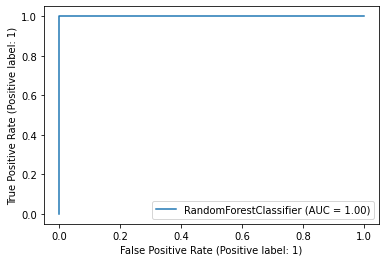

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection

metrics.plot_roc_curve(rf, X_Test, Y_Test) 
plt.show()

# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(rf,X_Train, Y_Train,cv=5)
print(score_rf)
print('avg:',np.average(score_rf))


[1.         0.99998826 1.         0.99999413 1.        ]
avg: 0.9999964784805819


# **Feature Selection**

In [ ]:
var_columns1= [c for c in df.columns]
#checking the importance of parameters so as to know which have more impact and which have less impact on final Fault value
#pd.DataFrame({"Variable name":var_columns1,"Importance":rf.feature_importances_}).sort_values('Importance', ascending=False)

# **Navie bayes Model**

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_Train, Y_Train).predict(X_Test)

In [254]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_Test, y_pred).ravel()
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(Accuracy)

98.94166851546002


# **Cross validation 10 fold**

In [256]:
from sklearn.model_selection import cross_val_score
score_nb=cross_val_score(gnb,X_Train, Y_Train,cv=10)
print(score_nb)
print('avg:',np.average(score_nb))

[0.98977592 0.98895423 0.98941203 0.9894942  0.9895645  0.98900106
 0.9894706  0.98957624 0.98904801 0.98924756]
avg: 0.9893544340458152
